In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [3]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [16]:
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
mars_months = mars_df["month"].nunique()
print(f'There are', mars_months ,'months on Mars.')

There are 12 months on Mars.


In [15]:
martian_days = mars_df['sol'].nunique()
print(f'There are', martian_days, 'Martian days worth of data exist in the scraped dataset.')

There are 1867 Martian days worth of data exist in the scraped dataset.


In [18]:
avg_monthly_temp = mars_df.groupby("month")["min_temp"].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

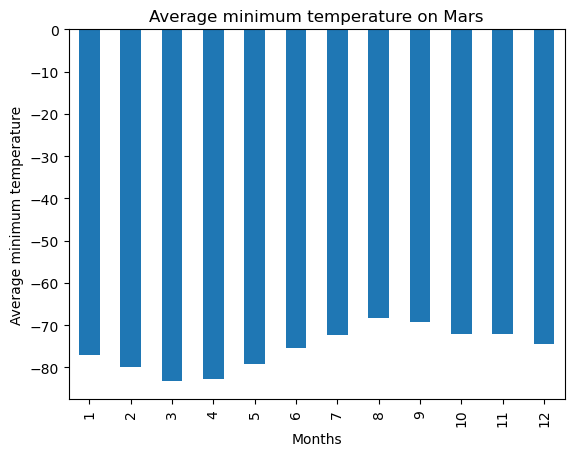

In [22]:
avg_monthly_temp.plot.bar()
plt.xlabel("Months")
plt.ylabel("Average minimum temperature")
plt.title("Average minimum temperature on Mars")
plt.show

In [23]:
avg_monthly_pressure = mars_df.groupby("month")["pressure"].mean()
avg_monthly_pressure
#The coldest month is March, the warmest month is August.

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

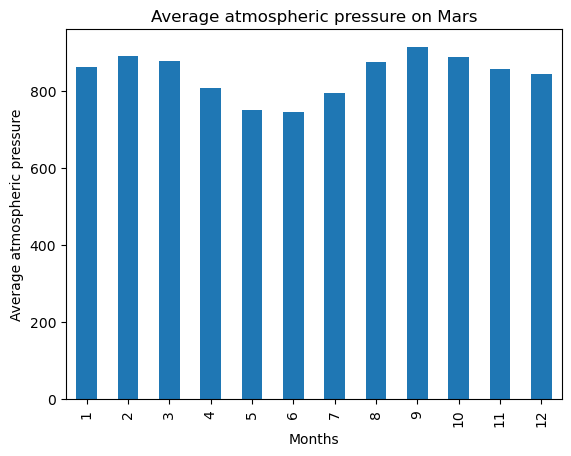

In [25]:
avg_monthly_pressure.plot.bar()
plt.xlabel("Months")
plt.ylabel("Average atmospheric pressure")
plt.title("Average atmospheric pressure on Mars")
plt.show
#The lowest atmosphere on Mars is June, the highest is September.

In [ ]:
mars_df.to_csv('mars_temp.csv', index=False)